In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].interpolate(method = 'linear', limit_direction = 'forward', inplace = True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

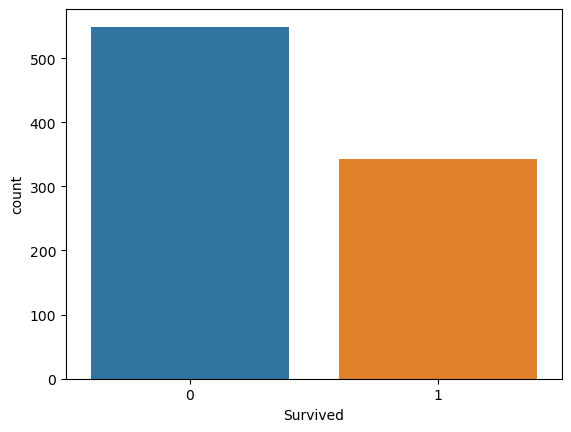

In [8]:
sns.countplot(data=df, x='Survived' )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

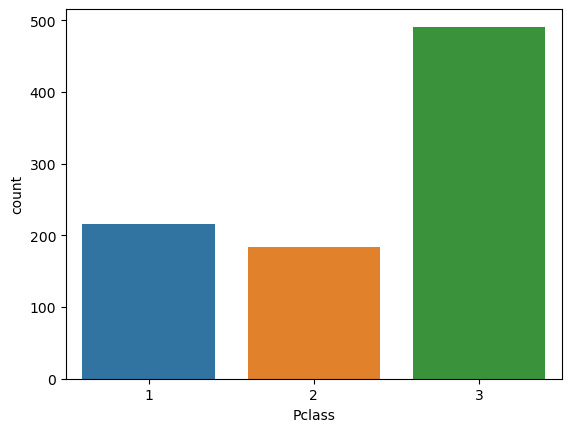

In [9]:
sns.countplot(data=df, x='Pclass' )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

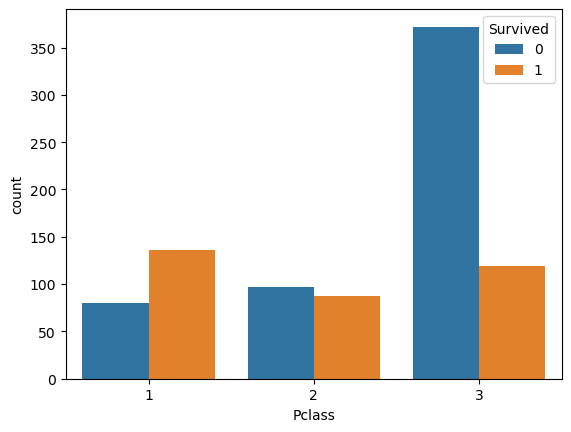

In [10]:
sns.countplot(data=df, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

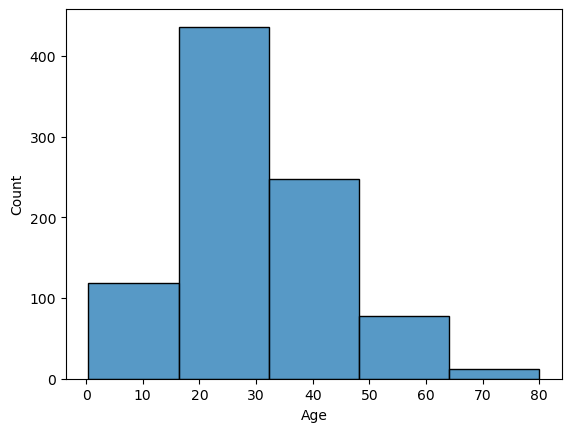

In [11]:
sns.histplot(data=df, x='Age', bins=5 )

<AxesSubplot:xlabel='Sex', ylabel='count'>

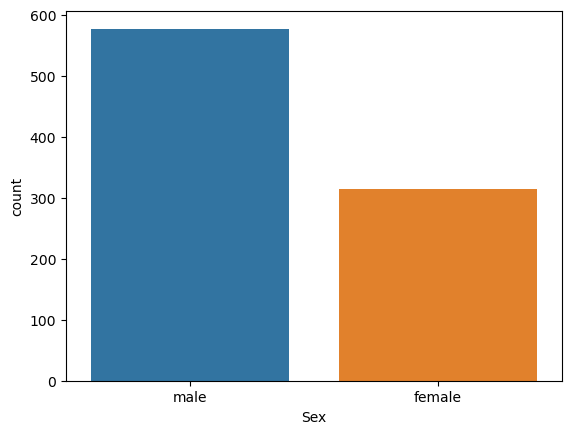

In [12]:
sns.countplot(data=df, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

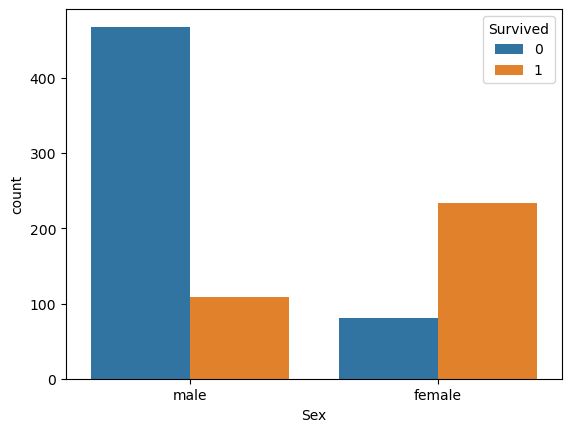

In [13]:
sns.countplot(data=df, x='Sex', hue='Survived')

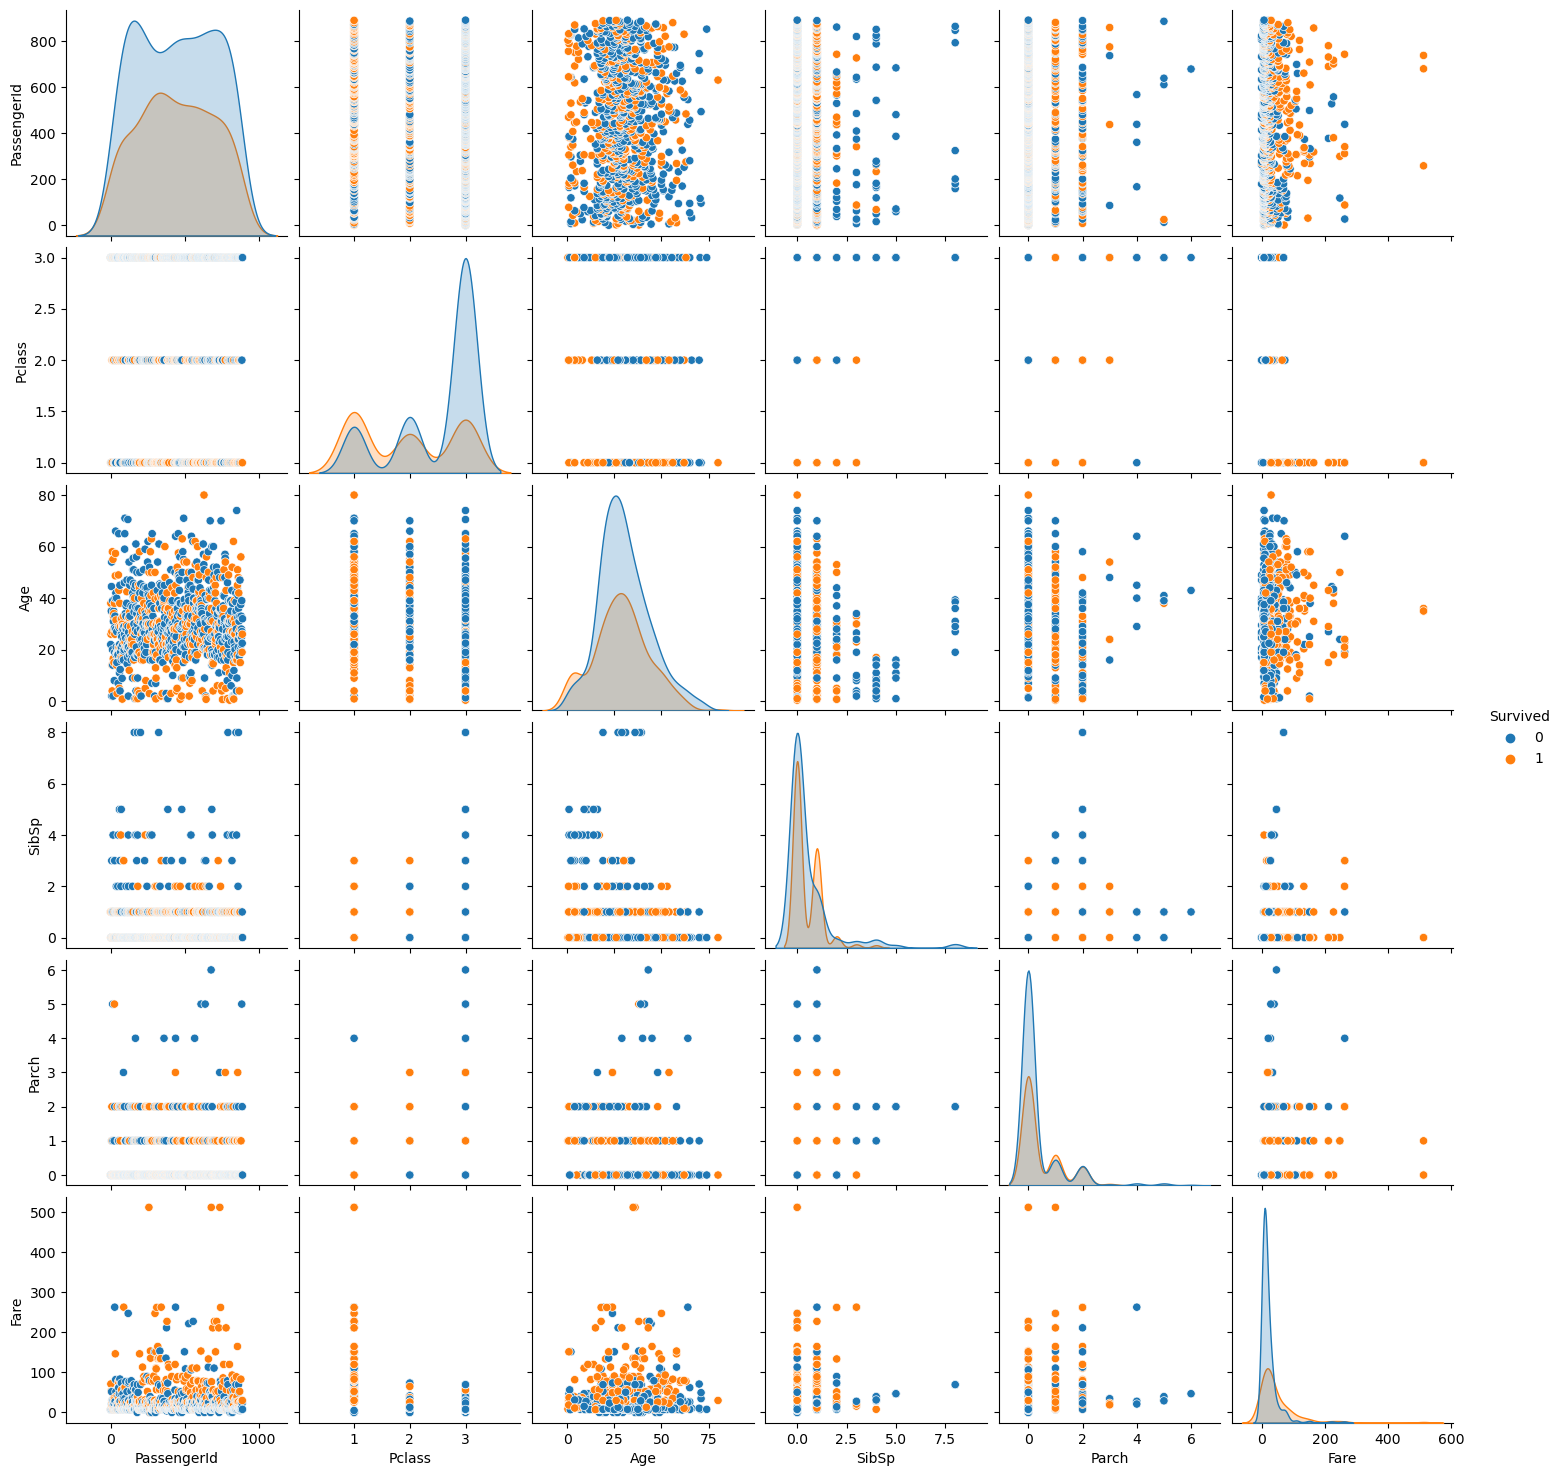

In [14]:
sns.pairplot(data=df, hue='Survived')

<AxesSubplot:>

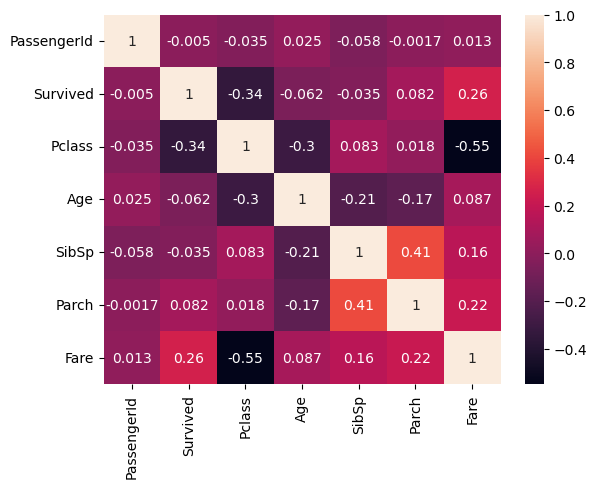

In [15]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

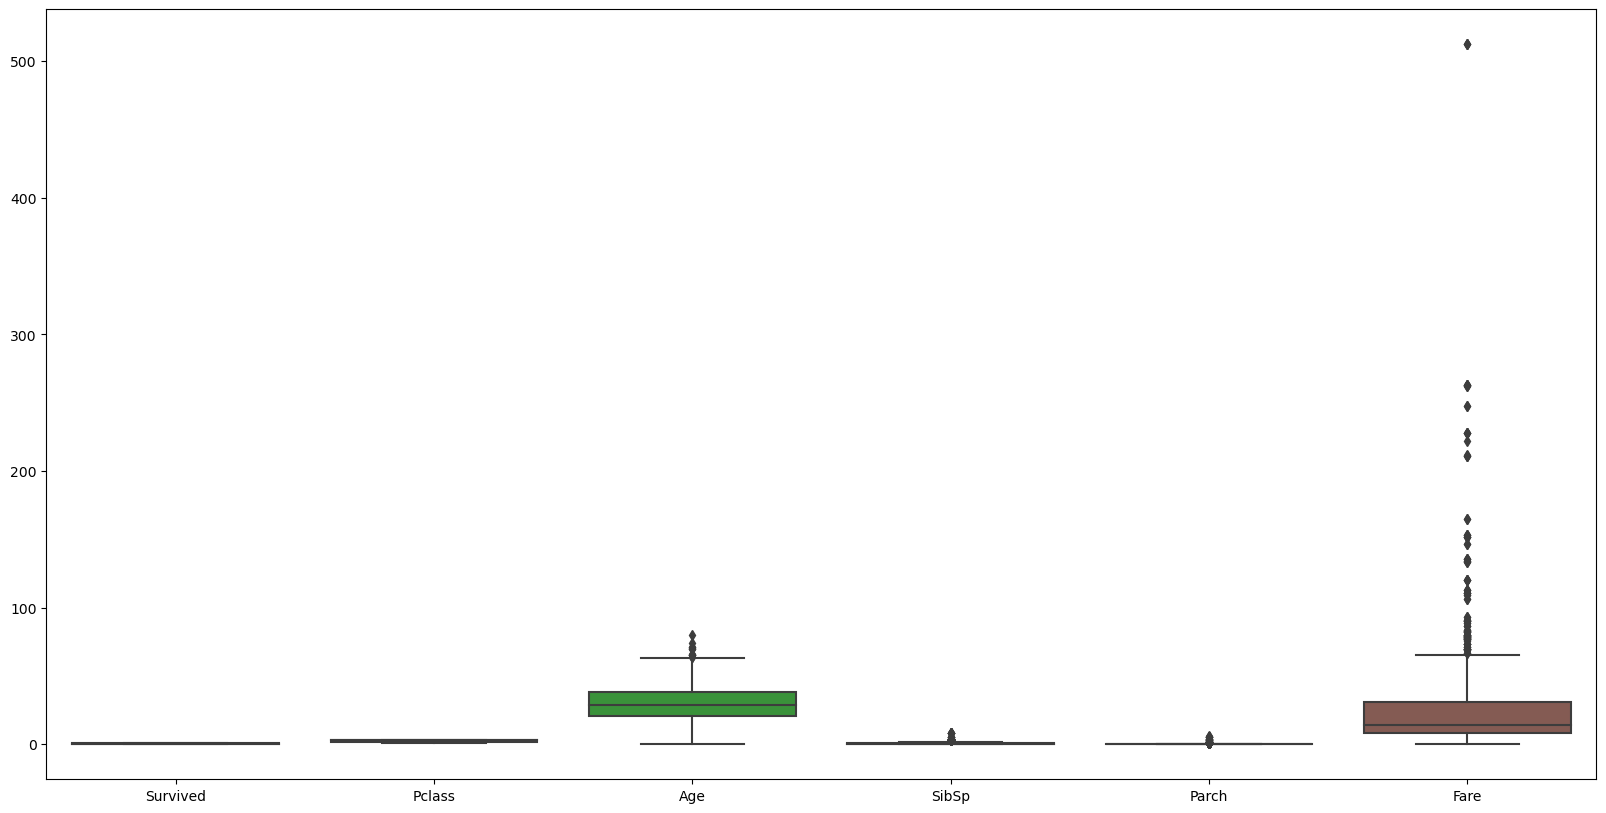

In [16]:
df2 = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
plt.figure(figsize = (20,10))
sns.boxplot(data=df2)

In [17]:
import warnings as wr
wr.filterwarnings('ignore')

def outlier(df):
    df1=df.copy()
    df=df._get_numeric_data()
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    
    for col in df.columns:
        for i in range(0,len(df[col])):
            if df[col][i] < lower_bound[col]:
                df[col][i] = lower_bound[col]
                
            if df[col][i] > upper_bound[col]:
                df[col][i] = upper_bound[col]
    
    for col in df.columns:
        df1[col]=df[col]
        
    return(df1)

df=outlier(df)

<AxesSubplot:>

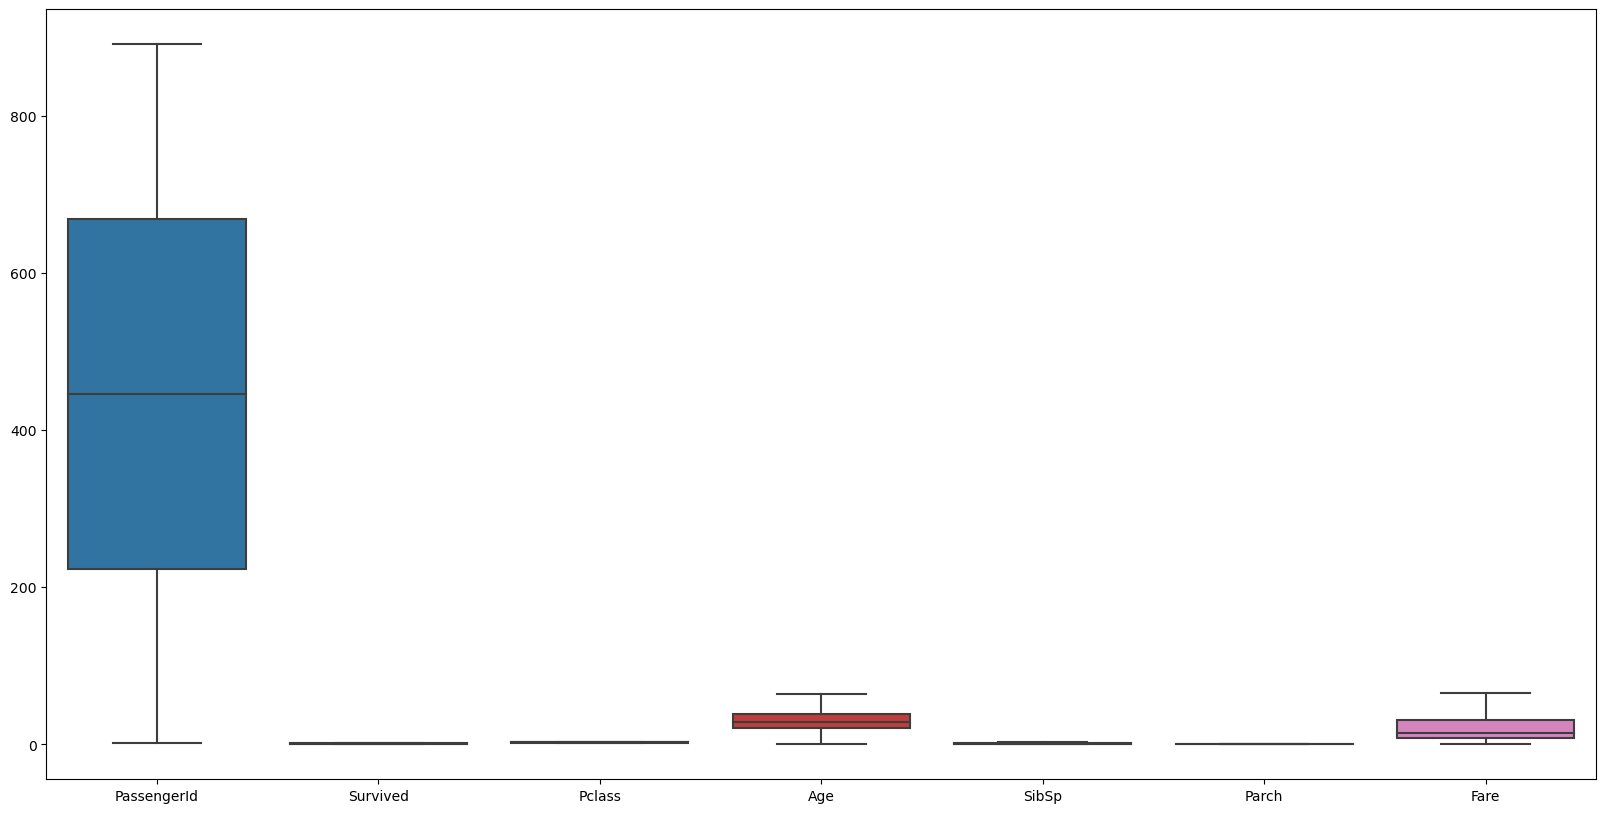

In [18]:
plt.figure(figsize = (20,10))
sns.boxplot(data=df)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['sex'] = le.fit_transform(df['Sex'])

In [21]:
df.drop(['PassengerId','Name','Sex','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [22]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [24]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
model.score(x_test,y_test)

0.7668161434977578